## Importing libraries

In [10]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


## Set options

In [5]:
# show max columns and rows 
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Uploading file for EDA

In [7]:
# Upload file 
df = pd.read_csv("StudentsPerformance.csv")

## EDA 

### Step 1 : Composition

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.shape

(1000, 8)

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
def aggregate (col):
    mini , maxi  = col.agg(['min', 'max'])
    return f'''Minimum :{mini} and Maximum {maxi}'''


In [17]:
aggregate(df['math score'])


'Minimum :0 and Maximum 100'

In [18]:
aggregate(df['reading score'])


'Minimum :17 and Maximum 100'

In [19]:
aggregate(df['writing score'])

'Minimum :10 and Maximum 100'

In [20]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [22]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### total number of male and female

In [24]:
df[df['gender'] == 'male'].value_counts().sum()

482

In [25]:
df[df['gender'] == 'female'].value_counts().sum()

518

## Step 3: Distribution

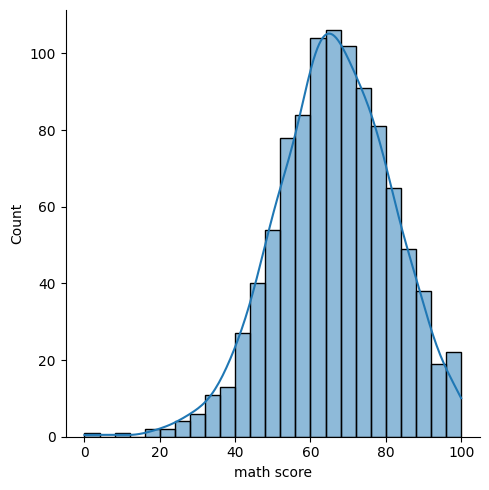

In [27]:
sns.displot(df, x =df['math score'], kde = True )

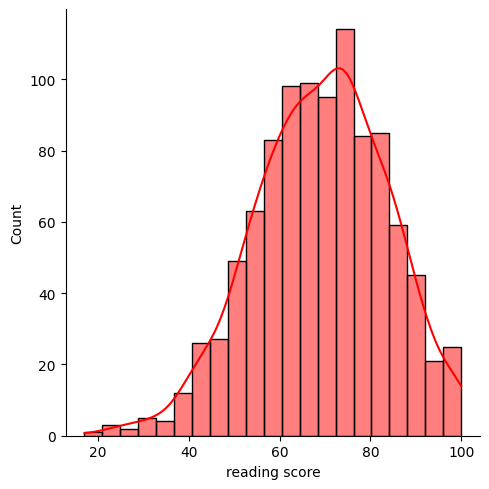

In [28]:
sns.displot(df, x = df['reading score'] ,color= 'red' , kde = True)

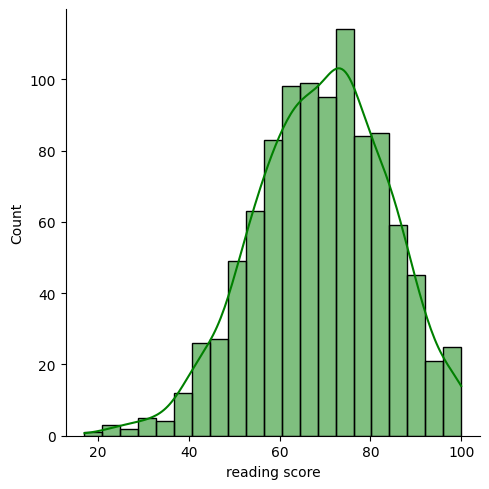

In [29]:
sns.displot(df, x = df['reading score'] ,color= 'green' , kde = True , ) ## add bin commond later

<Axes: xlabel='gender', ylabel='count'>

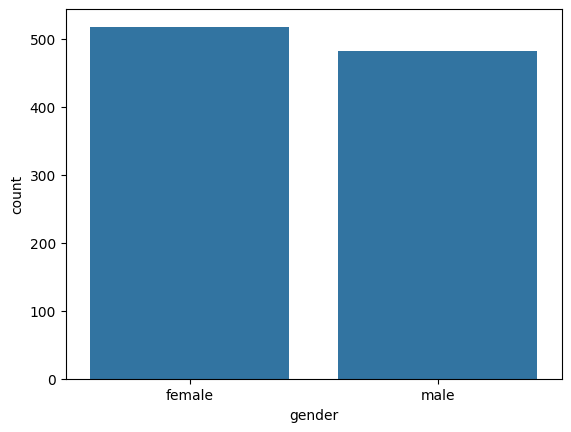

In [30]:
sns.countplot(df , x = df ['gender'])

<Axes: xlabel='parental level of education', ylabel='count'>

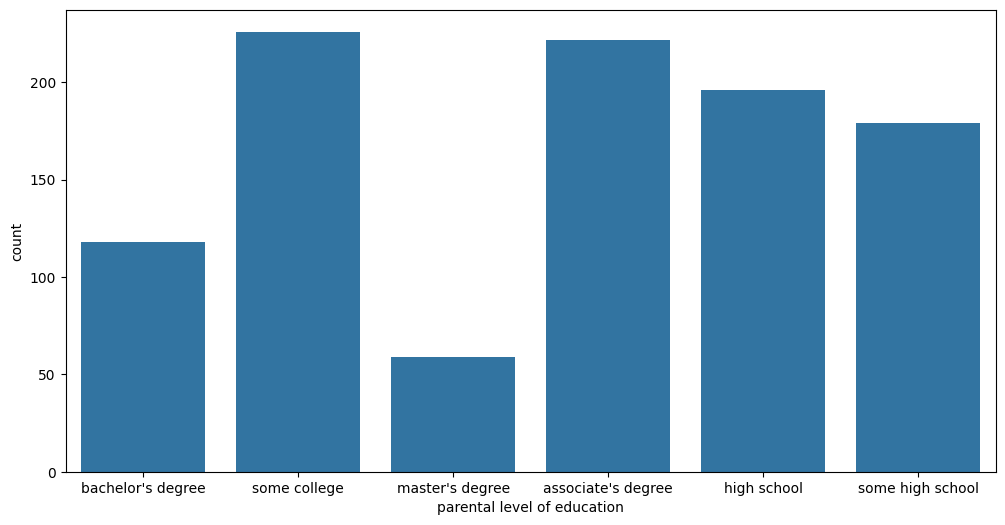

In [31]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df , x = df ['parental level of education'])

<Axes: xlabel='race/ethnicity', ylabel='count'>

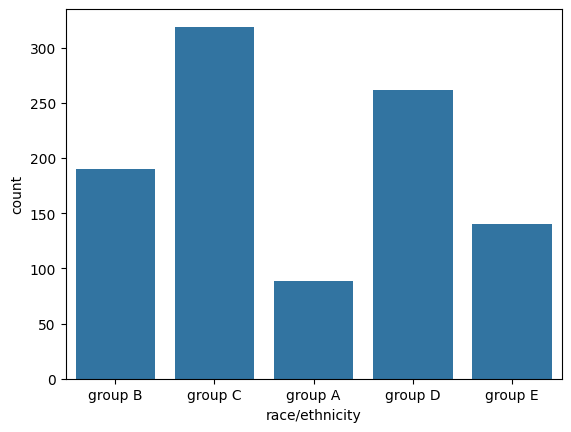

In [32]:
sns.countplot(df , x = df['race/ethnicity'])

<Axes: xlabel='race/ethnicity', ylabel='count'>

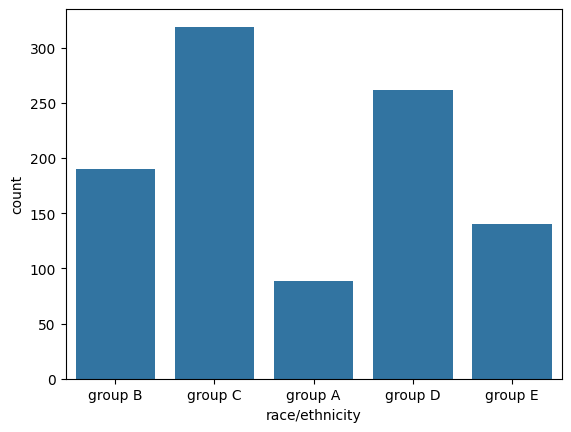

In [33]:
sns.countplot(df , x = df['race/ethnicity'])

<Axes: xlabel='test preparation course', ylabel='count'>

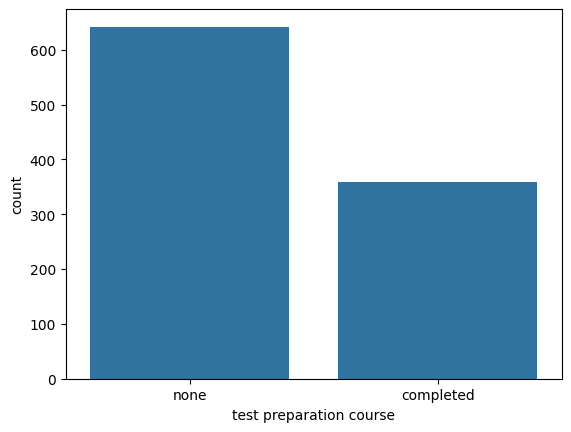

In [34]:
sns.countplot(df , x = df['test preparation course'])

## Step 3 Relationship

In [36]:
df.isnull().sum() / len(df) * 100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

<Axes: xlabel='race/ethnicity', ylabel='math score'>

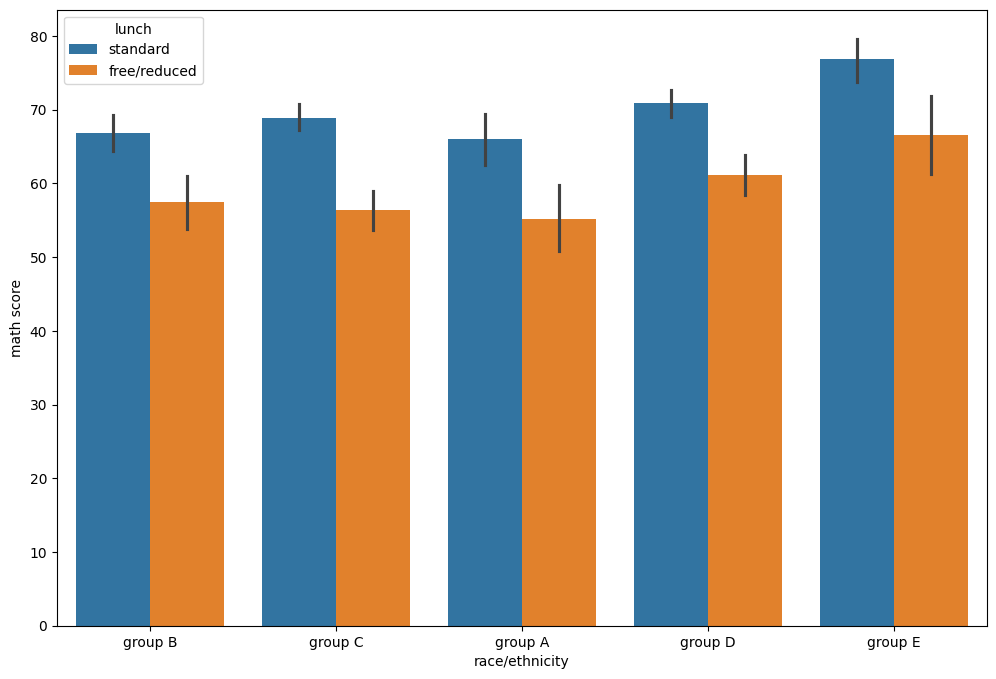

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(df , x = df['race/ethnicity'] , y = df['math score'], hue= df['lunch'])

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

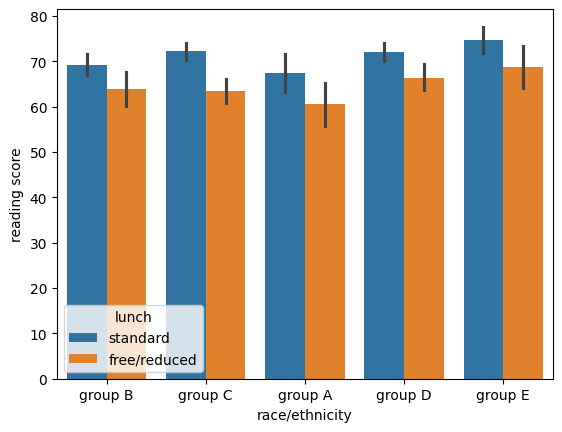

In [38]:
sns.barplot(df , x = df['race/ethnicity'] , y = df['reading score'], hue= df['lunch'])

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

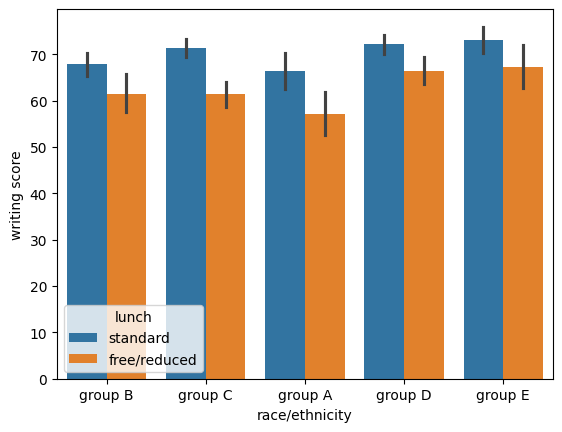

In [39]:
sns.barplot(df , x = df['race/ethnicity'] , y = df['writing score'], hue= df['lunch'])

<Axes: xlabel='gender', ylabel='writing score'>

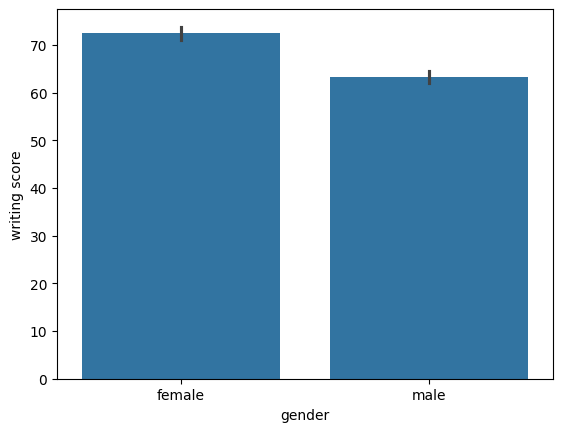

In [40]:
sns.barplot(df , x = df['gender'] , y = df['writing score'], )

<Axes: xlabel='gender', ylabel='writing score'>

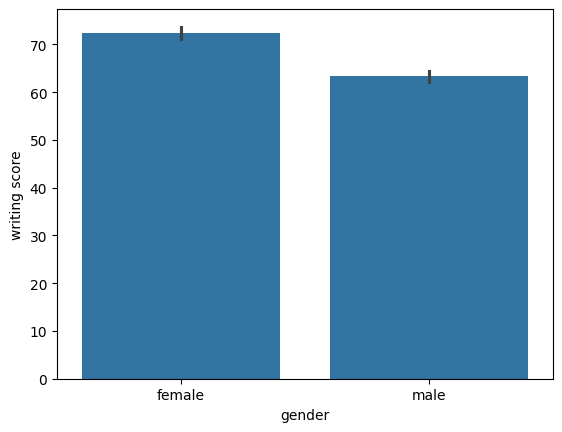

In [41]:
sns.barplot(df , x = df['gender'] , y = df['writing score'], )

<Axes: xlabel='gender', ylabel='math score'>

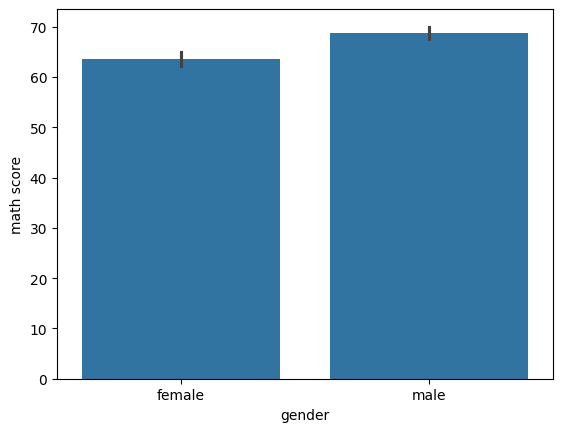

In [42]:
sns.barplot(df , x = df['gender'] , y = df['math score'], )

<Axes: xlabel='gender', ylabel='reading score'>

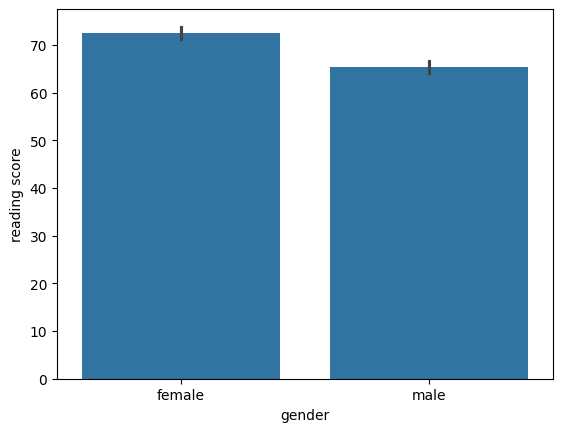

In [43]:
sns.barplot(df , x = df['gender'] , y = df['reading score'], )

In [44]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [45]:
df.iloc[59]

gender                                   female
race/ethnicity                          group C
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                    0
reading score                                17
writing score                                10
Name: 59, dtype: object

In [116]:
full_marks_reading = df['reading score'].nlargest(15)

In [118]:
full_marks_math = df['math score'].nlargest(15)
print(full_marks_math)

149    100
451    100
458    100
623    100
625    100
916    100
962    100
114     99
263     99
306     99
104     98
712     98
934     98
34      97
179     97
Name: math score, dtype: int64


In [120]:
full_marks_writing = df['writing score'].nlargest(15)
print(full_marks_writing)

106    100
114    100
165    100
179    100
377    100
403    100
458    100
566    100
685    100
903    100
916    100
957    100
962    100
970    100
594     99
Name: writing score, dtype: int64


In [122]:
values = np.intersect1d(full_marks_math.index,full_marks_reading.index)
common_values = np.intersect1d(values , full_marks_writing.index)

print (common_values)

[114 179 458 916]


In [158]:
largest_common_index = common_values
print(df.iloc[largest_common_index])

     gender race/ethnicity parental level of education     lunch  \
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   
458  female        group E           bachelor's degree  standard   
916    male        group E           bachelor's degree  standard   

    test preparation course  math score  reading score  writing score  
114               completed          99            100            100  
179               completed          97            100            100  
458                    none         100            100            100  
916               completed         100            100            100  


In [148]:
def lowestScoreIndex(col):
    index = col.nsmallest(12).index
    return index
mathtlowestnumbers = lowestScoreIndex(df['math score'])
writnglowestnumbers = lowestScoreIndex(df['writing score'])
readinglowestnumbers = lowestScoreIndex(df['reading score'])

In [150]:
samllest_values = np.intersect1d(mathtlowestnumbers,writnglowestnumbers)
common_smllest_values = np.intersect1d(samllest_values,readinglowestnumbers)
print(df.loc[common_smllest_values])

     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
327    male        group A                some college  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
327                    none          28             23             19  
980                    none           8             24             23  
